# BÀI TẬP THỰC HÀNH 1.1.4 & 1.2.3
# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU - PIMA INDIANS DIABETES

**Mục tiêu:**
- Thực hiện thống kê mô tả trên tập dữ liệu bệnh tiểu đường
- Trực quan hóa dữ liệu với Matplotlib và Seaborn
- Phân tích đơn biến và hai biến
- Xử lý giá trị 0 bất thường và phát hiện outliers

**Dữ liệu:** Pima Indians Diabetes Dataset

## 1. IMPORT THƯ VIỆN VÀ CẤU HÌNH

- Import pandas, numpy, matplotlib.pyplot, seaborn, scipy.stats, warnings
- Input: File CSV, Excel hoặc URL; Dữ liệu số (arrays, lists); DataFrame hoặc arrays
- Output: DataFrame object; Kết quả tính toán (mean, median, std, etc.); Các đối tượng figure và axes để hiển thị biểu đồ; Biểu đồ statistical với styling tốt hơn; Các giá trị thống kê và kết quả kiểm định
- Cấu hình

In [23]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
%matplotlib inline

# Cấu hình pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Đã import thư viện thành công!")

✓ Đã import thư viện thành công!


## 2. NẠP VÀ KHÁM PHÁ DỮ LIỆU BAN ĐẦU

- Nạp dữ liệu từ URL
 - Hàm: pd.read_csv()
 - Input: URL hoặc đường dẫn file CSV
 - Output: DataFrame chứa dữ liệu
 - Số biến: 9 cột (8 features + 1 target)

In [24]:
# Nạp dữ liệu từ URL
url = "https://hebbkx1anhila5yf.public.blob.vercel-storage.com/diabetes-nXiUXCptYyyhO8YsUJjxyKHU7ROsYF.csv"
diabetes_data = pd.read_csv(url)

print(f"✓ Đã nạp dữ liệu thành công!")
print(f"  Số bệnh nhân: {diabetes_data.shape[0]}")
print(f"  Số đặc trưng: {diabetes_data.shape[1]}")

✓ Đã nạp dữ liệu thành công!
  Số bệnh nhân: 768
  Số đặc trưng: 9


In [25]:
# Hiển thị 5 dòng đầu tiên
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [26]:
# Thông tin về dữ liệu
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
# Tên các cột
print("Các đặc trưng trong dữ liệu:")
for idx, col in enumerate(diabetes_data.columns, 1):
    print(f"  {idx}. {col}")

Các đặc trưng trong dữ liệu:
  1. Pregnancies
  2. Glucose
  3. BloodPressure
  4. SkinThickness
  5. Insulin
  6. BMI
  7. DiabetesPedigreeFunction
  8. Age
  9. Outcome


## 3. THỐNG KÊ MÔ TẢ

### 3.1. Kiểm tra giá trị thiếu
 Kiểm tra giá trị thiếu (NA)
 - Hàm: DataFrame.isnull().sum()
 - Input: DataFrame
 - Output: Series với số lượng NA của từng cột
 - Cách hoạt động:
   1. isnull() tạo DataFrame boolean (True nếu NA)
   2. sum() đếm số True trong mỗi cột

In [28]:
# Kiểm tra giá trị thiếu (NA)
print("Số lượng giá trị thiếu trong từng cột:")
print(diabetes_data.isnull().sum())
print(f"\nTổng số giá trị thiếu: {diabetes_data.isnull().sum().sum()}")

Số lượng giá trị thiếu trong từng cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tổng số giá trị thiếu: 0


### 3.2. Kiểm tra giá trị 0 bất thường
Kiểm tra giá trị 0 trong các cột không hợp lệ
 - Input: List các cột cần kiểm tra
 - Output: Số lượng và tỷ lệ % giá trị 0
 - Lý do: Glucose, BloodPressure, BMI không thể = 0 trong thực tế
 - ---
Tạo bản sao và thay thế giá trị 0 bằng NaN
 - Hàm: DataFrame.copy(), Series.replace()
 - Input: Giá trị cần thay (0), giá trị thay thế (np.nan)
 - Output: DataFrame mới với giá trị 0 đã được thay bằng NaN
 - Mục đích: Xử lý giá trị 0 bất thường để tính thống kê chính xác
##### **Lưu ý:** Một số biến không thể có giá trị 0 (ví dụ: Glucose, BloodPressure, BMI)

In [29]:
# Kiểm tra giá trị 0 trong các cột không hợp lệ
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Số lượng giá trị 0 trong các cột:")
print("="*60)
print(f"{'Cột':<20} {'Số lượng 0':<15} {'Tỷ lệ (%)':<15}")
print("-"*60)

for col in zero_columns:
    zero_count = (diabetes_data[col] == 0).sum()
    zero_percent = (zero_count / len(diabetes_data)) * 100
    print(f"{col:<20} {zero_count:<15} {zero_percent:<15.2f}")

Số lượng giá trị 0 trong các cột:
Cột                  Số lượng 0      Tỷ lệ (%)      
------------------------------------------------------------
Glucose              5               0.65           
BloodPressure        35              4.56           
SkinThickness        227             29.56          
Insulin              374             48.70          
BMI                  11              1.43           


In [30]:
# Tạo bản sao và thay thế giá trị 0 bằng NaN
diabetes_cleaned = diabetes_data.copy()
for col in zero_columns:
    diabetes_cleaned[col] = diabetes_cleaned[col].replace(0, np.nan)

print("✓ Đã thay thế giá trị 0 bằng NaN cho các cột không hợp lệ")
print(f"\nSố lượng giá trị thiếu sau khi xử lý:")
print(diabetes_cleaned.isnull().sum())

✓ Đã thay thế giá trị 0 bằng NaN cho các cột không hợp lệ

Số lượng giá trị thiếu sau khi xử lý:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 3.3. Thống kê mô tả cơ bản

In [31]:
# Thống kê mô tả dữ liệu gốc
print("THỐNG KÊ MÔ TẢ (DỮ LIỆU GỐC):")
diabetes_data.describe()

THỐNG KÊ MÔ TẢ (DỮ LIỆU GỐC):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [32]:
# Thống kê mô tả sau khi xử lý giá trị 0
print("THỐNG KÊ MÔ TẢ (SAU KHI XỬ LÝ GIÁ TRỊ 0):")
diabetes_cleaned.describe()

THỐNG KÊ MÔ TẢ (SAU KHI XỬ LÝ GIÁ TRỊ 0):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### 3.4. Phân bố kết quả (Outcome)

In [33]:
# Phân bố outcome
outcome_counts = diabetes_data['Outcome'].value_counts()
print("PHÂN BỐ KẾT QUẢ BỆNH TIỂU ĐƯỜNG:")
print("="*50)
print(outcome_counts)
print(f"\nTỷ lệ:")
print(f"  Không bị tiểu đường (0): {outcome_counts[0]} ({outcome_counts[0]/len(diabetes_data)*100:.2f}%)")
print(f"  Bị tiểu đường (1):      {outcome_counts[1]} ({outcome_counts[1]/len(diabetes_data)*100:.2f}%)")

PHÂN BỐ KẾT QUẢ BỆNH TIỂU ĐƯỜNG:
Outcome
0    500
1    268
Name: count, dtype: int64

Tỷ lệ:
  Không bị tiểu đường (0): 500 (65.10%)
  Bị tiểu đường (1):      268 (34.90%)


### 3.5. Thống kê chi tiết cho biến Glucose

In [34]:
# Tính các thước đo thống kê cho biến Glucose
glucose_stats = {
    'Mean (Trung bình)': np.mean(diabetes_data['Glucose']),
    'Median (Trung vị)': np.median(diabetes_data['Glucose']),
    'Mode (Yếu vị)': stats.mode(diabetes_data['Glucose'], keepdims=True)[0][0],
    'Variance (Phương sai)': np.var(diabetes_data['Glucose']),
    'Std Dev (Độ lệch chuẩn)': np.std(diabetes_data['Glucose']),
    'Min (Giá trị nhỏ nhất)': np.min(diabetes_data['Glucose']),
    'Max (Giá trị lớn nhất)': np.max(diabetes_data['Glucose']),
    'Range (Phạm vi)': np.max(diabetes_data['Glucose']) - np.min(diabetes_data['Glucose']),
    'Q1 (Tứ phân vị 25%)': np.percentile(diabetes_data['Glucose'], 25),
    'Q2 (Tứ phân vị 50%)': np.percentile(diabetes_data['Glucose'], 50),
    'Q3 (Tứ phân vị 75%)': np.percentile(diabetes_data['Glucose'], 75),
    'IQR (Khoảng tứ phân vị)': stats.iqr(diabetes_data['Glucose'])
}

print("THỐNG KÊ CHI TIẾT CHO BIẾN GLUCOSE:")
print("="*50)
for key, value in glucose_stats.items():
    print(f"{key:30s}: {value:.4f}")

THỐNG KÊ CHI TIẾT CHO BIẾN GLUCOSE:
Mean (Trung bình)             : 120.8945
Median (Trung vị)             : 117.0000
Mode (Yếu vị)                 : 99.0000
Variance (Phương sai)         : 1020.9173
Std Dev (Độ lệch chuẩn)       : 31.9518
Min (Giá trị nhỏ nhất)        : 0.0000
Max (Giá trị lớn nhất)        : 199.0000
Range (Phạm vi)               : 199.0000
Q1 (Tứ phân vị 25%)           : 99.0000
Q2 (Tứ phân vị 50%)           : 117.0000
Q3 (Tứ phân vị 75%)           : 140.2500
IQR (Khoảng tứ phân vị)       : 41.2500


## 4. PHÁT HIỆN OUTLIERS

In [35]:
# Hàm phát hiện outliers
def detect_outliers_iqr(data, column):
    """Phát hiện outliers sử dụng phương pháp IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Kiểm tra outliers
numeric_columns = diabetes_data.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Outcome')

print("SỐ LƯỢNG OUTLIERS TRONG TỪNG BIẾN:")
print("="*80)
print(f"{'Biến':<30} {'Số outliers':<15} {'Giới hạn dưới':<15} {'Giới hạn trên':<15}")
print("-"*80)

for col in numeric_columns:
    n_outliers, lower, upper = detect_outliers_iqr(diabetes_data, col)
    if n_outliers > 0:
        print(f"{col:<30} {n_outliers:<15} {lower:<15.2f} {upper:<15.2f}")

SỐ LƯỢNG OUTLIERS TRONG TỪNG BIẾN:
Biến                           Số outliers     Giới hạn dưới   Giới hạn trên  
--------------------------------------------------------------------------------
Pregnancies                    4               -6.50           13.50          
Glucose                        5               37.12           202.12         
BloodPressure                  45              35.00           107.00         
SkinThickness                  1               -48.00          80.00          
Insulin                        34              -190.88         318.12         
BMI                            19              13.35           50.55          
DiabetesPedigreeFunction       29              -0.33           1.20           
Age                            9               -1.50           66.50          


## 5. TRỰC QUAN HÓA DỮ LIỆU - PHÂN TÍCH ĐƠN BIẾN

### 5.1. Phân bố Outcome và các biến quan trọng

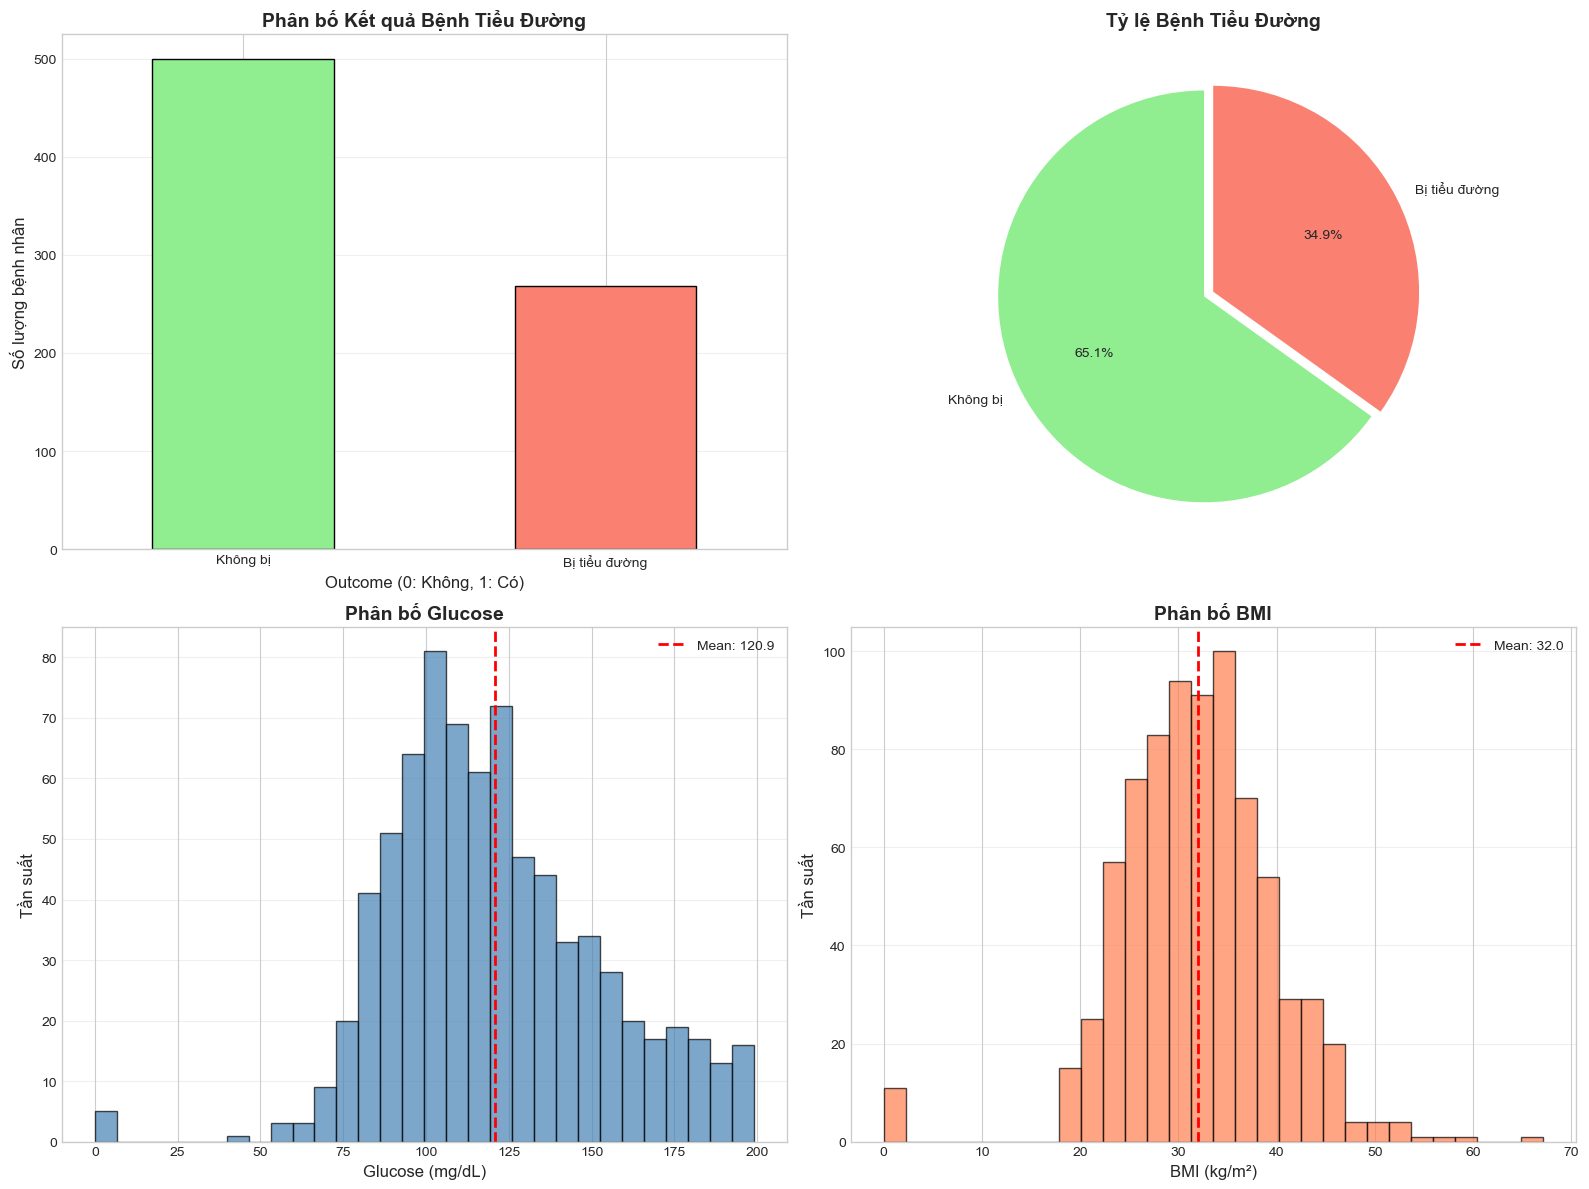

In [36]:
# Tạo biểu đồ tổng hợp
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bar chart cho Outcome
ax1 = axes[0, 0]
outcome_counts.plot(kind='bar', ax=ax1, color=['lightgreen', 'salmon'], edgecolor='black')
ax1.set_title('Phân bố Kết quả Bệnh Tiểu Đường', fontsize=14, fontweight='bold')
ax1.set_xlabel('Outcome (0: Không, 1: Có)', fontsize=12)
ax1.set_ylabel('Số lượng bệnh nhân', fontsize=12)
ax1.set_xticklabels(['Không bị', 'Bị tiểu đường'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Pie chart cho Outcome
ax2 = axes[0, 1]
ax2.pie(outcome_counts, labels=['Không bị', 'Bị tiểu đường'], 
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'],
        startangle=90, explode=(0.05, 0))
ax2.set_title('Tỷ lệ Bệnh Tiểu Đường', fontsize=14, fontweight='bold')

# Histogram cho Glucose
ax3 = axes[1, 0]
ax3.hist(diabetes_data['Glucose'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax3.set_title('Phân bố Glucose', fontsize=14, fontweight='bold')
ax3.set_xlabel('Glucose (mg/dL)', fontsize=12)
ax3.set_ylabel('Tần suất', fontsize=12)
ax3.axvline(diabetes_data['Glucose'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {diabetes_data["Glucose"].mean():.1f}')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Histogram cho BMI
ax4 = axes[1, 1]
ax4.hist(diabetes_data['BMI'], bins=30, color='coral', edgecolor='black', alpha=0.7)
ax4.set_title('Phân bố BMI', fontsize=14, fontweight='bold')
ax4.set_xlabel('BMI (kg/m²)', fontsize=12)
ax4.set_ylabel('Tần suất', fontsize=12)
ax4.axvline(diabetes_data['BMI'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {diabetes_data["BMI"].mean():.1f}')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.2. Boxplots cho tất cả các biến

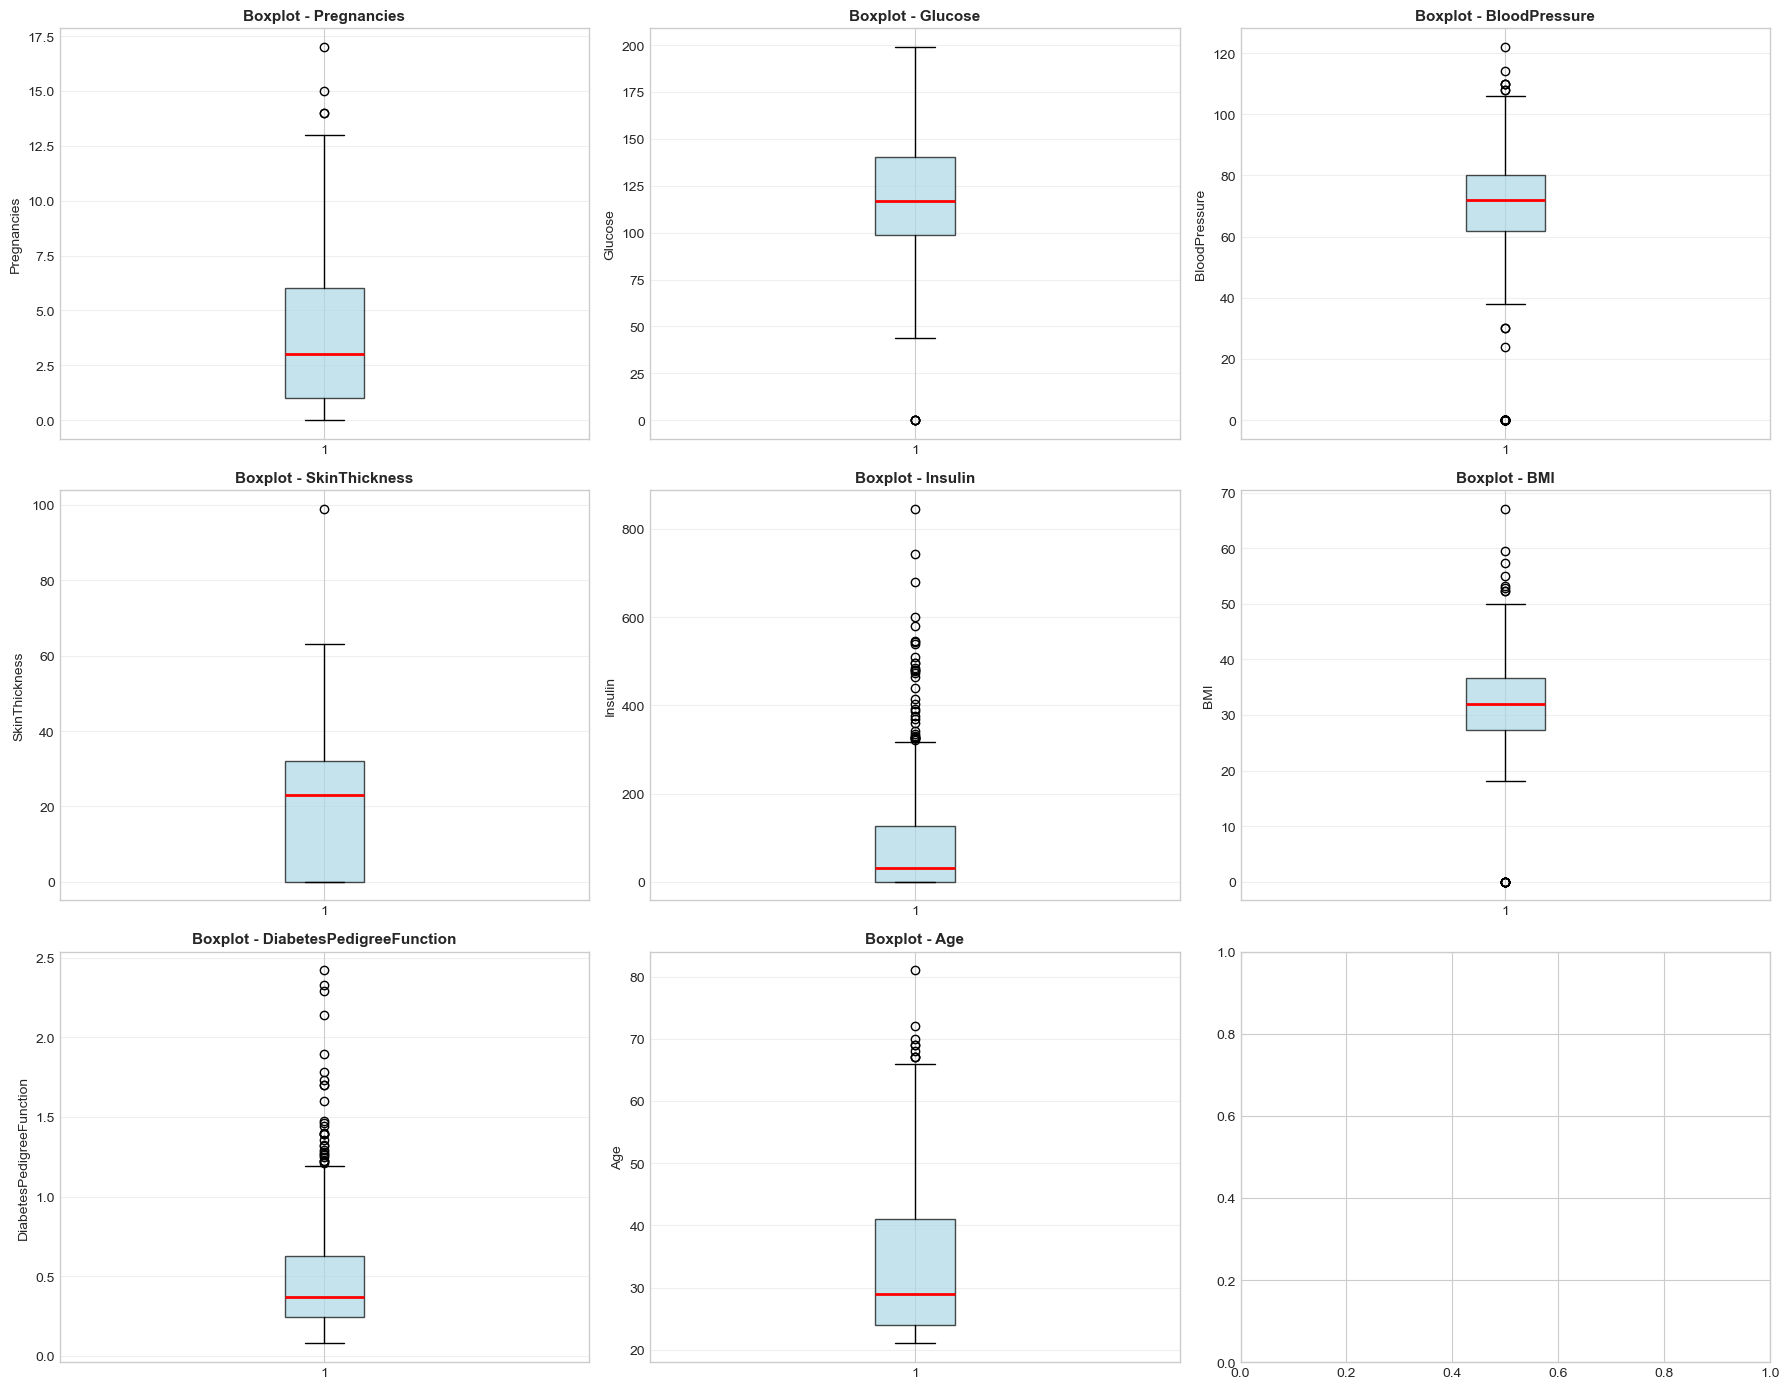

In [37]:
# Boxplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    axes[idx].boxplot(diabetes_data[col], vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot - {col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3. Phân bố của tất cả các biến

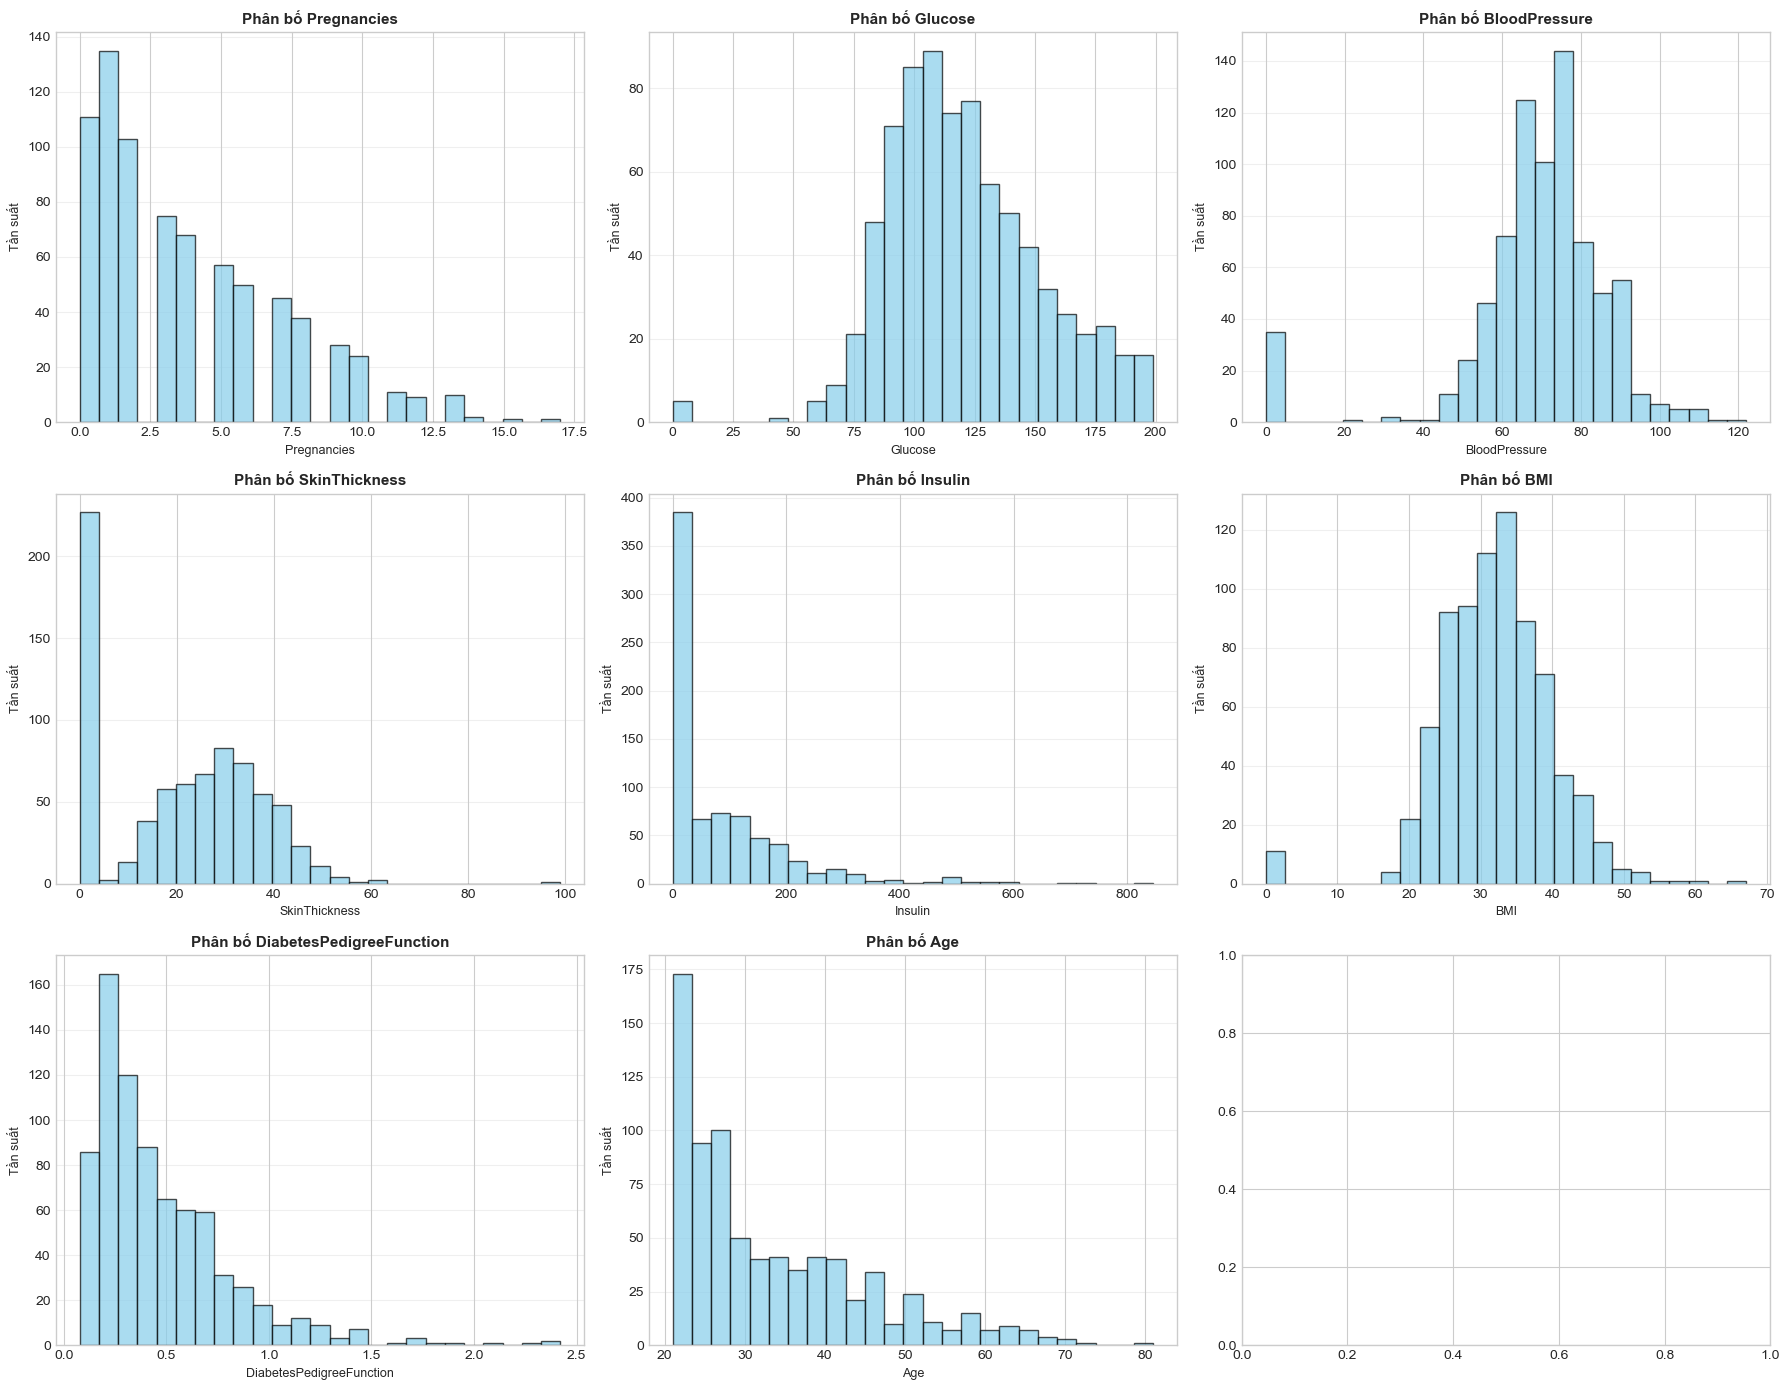

In [38]:
# Histogram cho tất cả các biến
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(diabetes_data[col], bins=25, color='skyblue', 
                   edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Phân bố {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=9)
    axes[idx].set_ylabel('Tần suất', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. PHÂN TÍCH HAI BIẾN

### 6.1. Ma trận tương quan

In [39]:
# Tính ma trận tương quan
correlation_matrix = diabetes_data.corr()

# Hiển thị tương quan với Outcome
print("TƯƠNG QUAN CỦA CÁC BIẾN VỚI OUTCOME:")
print("="*50)
print(correlation_matrix['Outcome'].sort_values(ascending=False))

TƯƠNG QUAN CỦA CÁC BIẾN VỚI OUTCOME:
Outcome                    1.00
Glucose                    0.47
BMI                        0.29
Age                        0.24
Pregnancies                0.22
DiabetesPedigreeFunction   0.17
Insulin                    0.13
SkinThickness              0.07
BloodPressure              0.07
Name: Outcome, dtype: float64


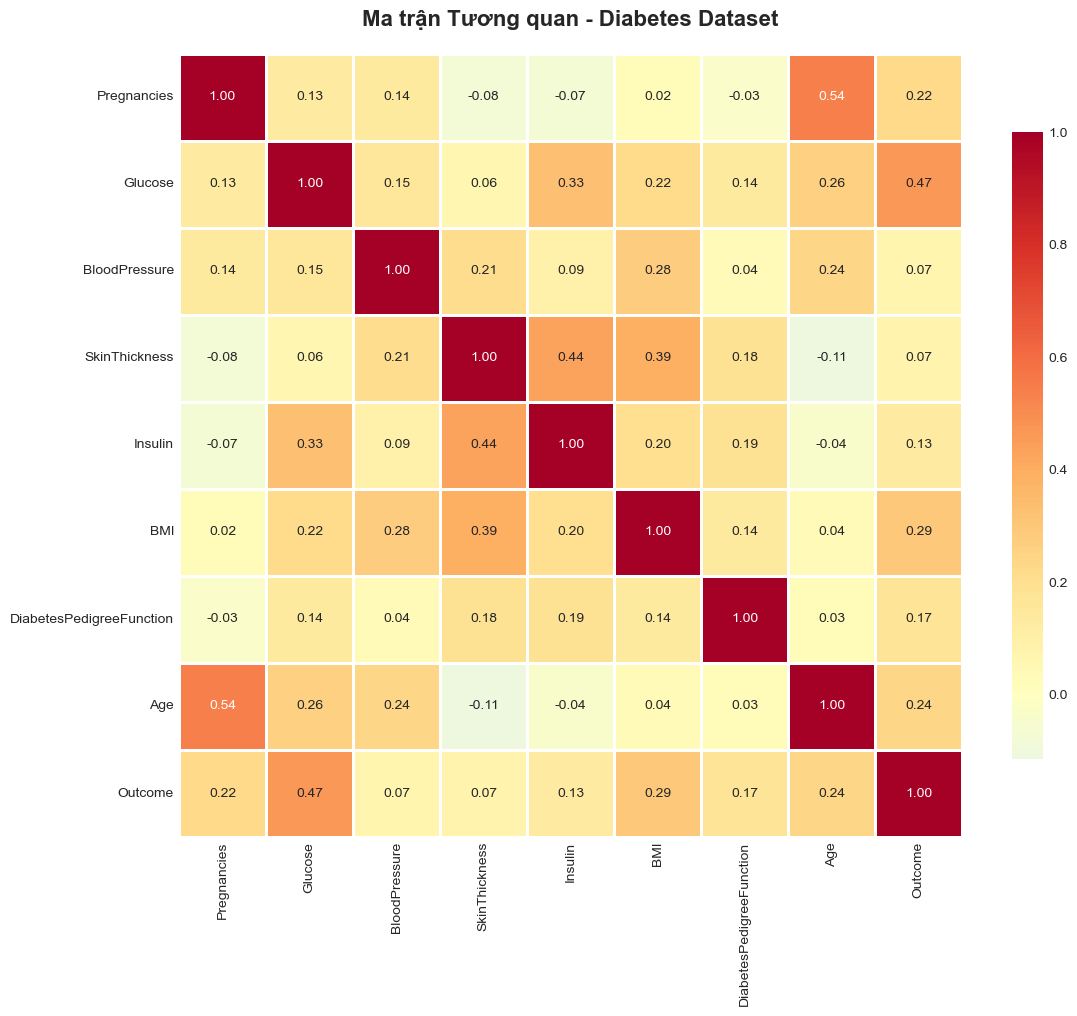

In [40]:
# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Ma trận Tương quan - Diabetes Dataset', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 6.2. So sánh các biến theo Outcome

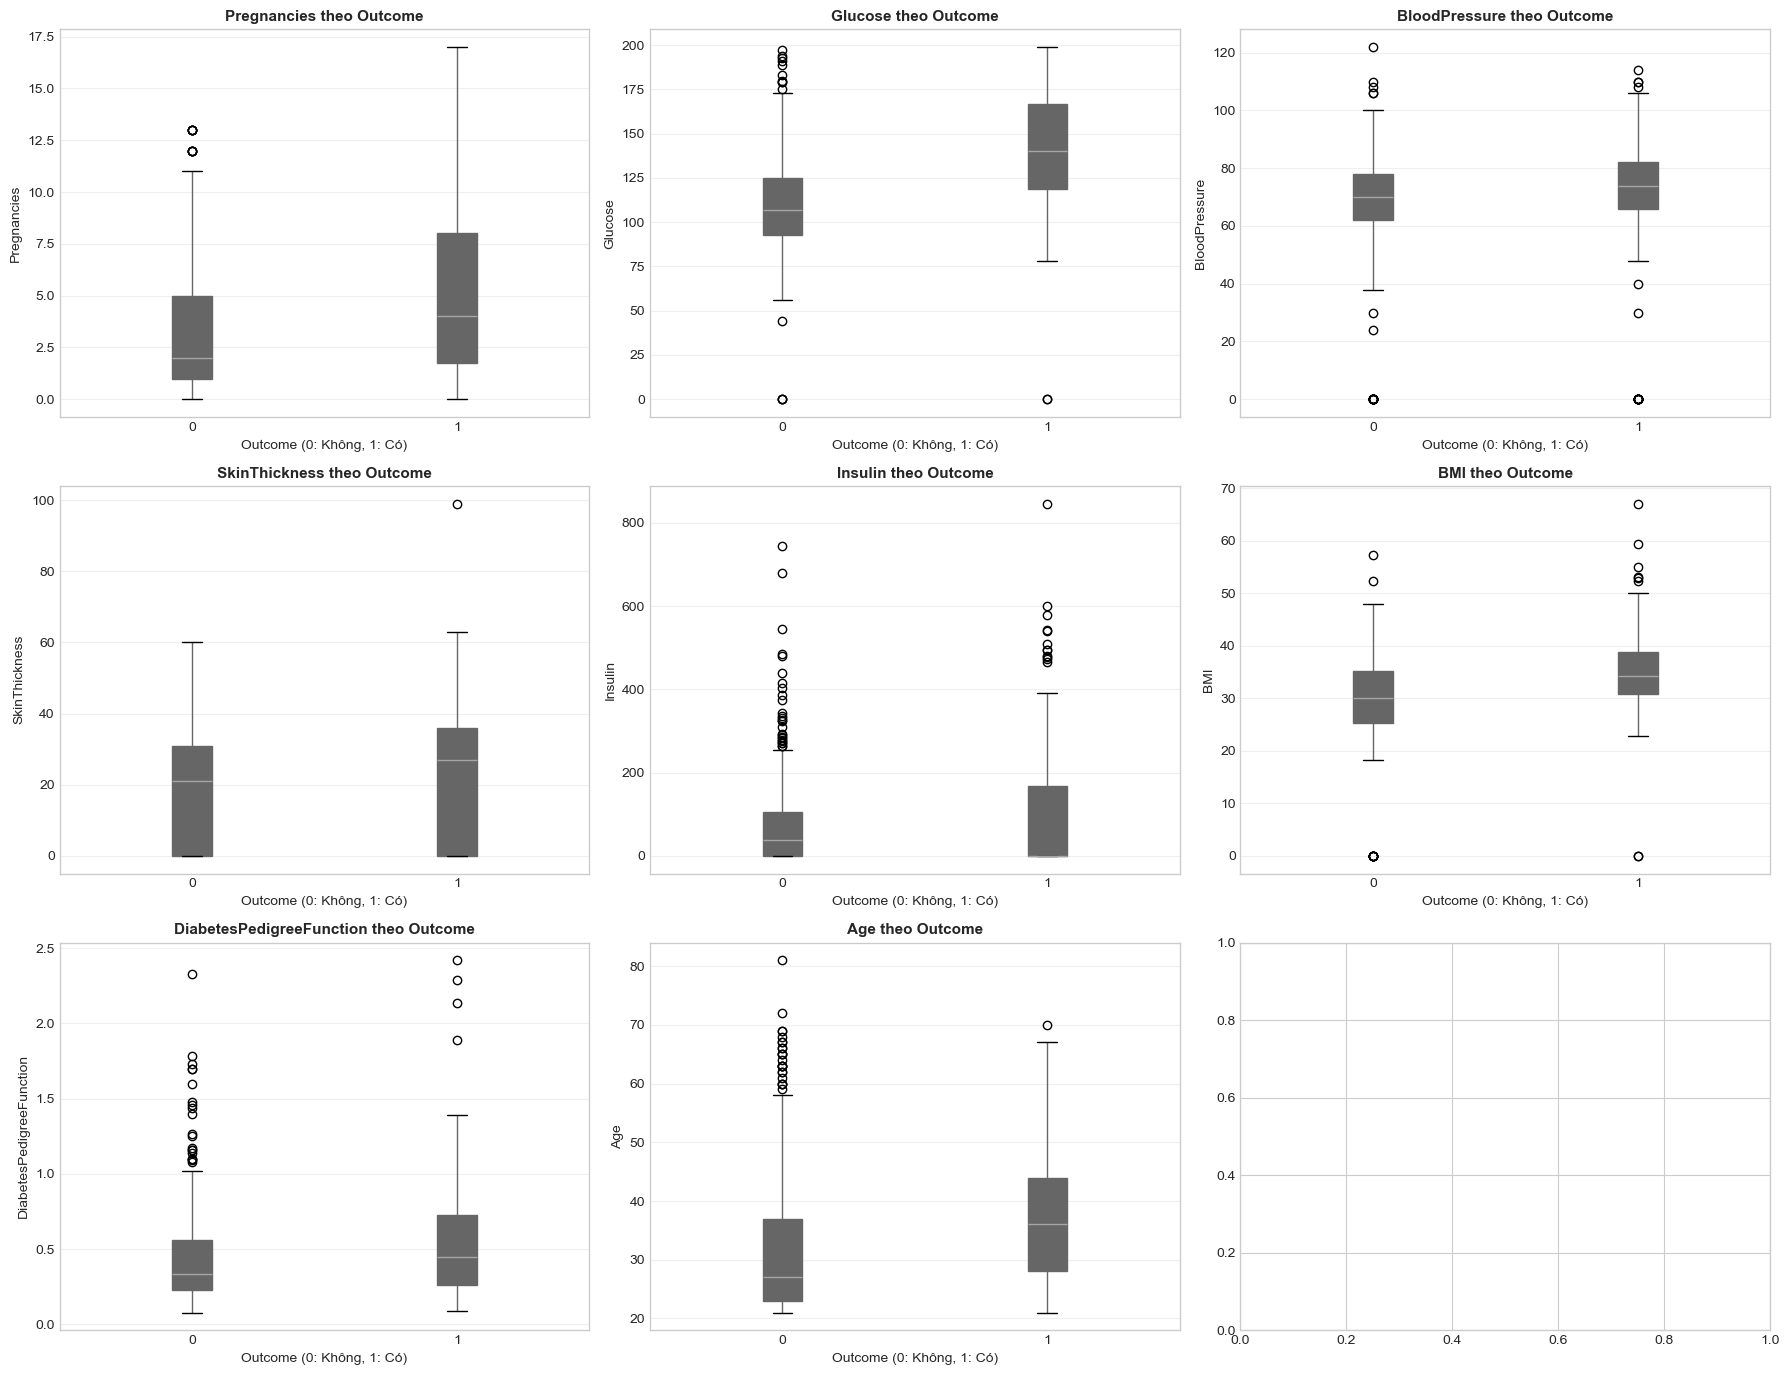

In [41]:
# Boxplots theo Outcome
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    diabetes_data.boxplot(column=col, by='Outcome', ax=axes[idx], 
                         patch_artist=True, grid=False)
    axes[idx].set_title(f'{col} theo Outcome', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Outcome (0: Không, 1: Có)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()

### 6.3. Violin plots theo Outcome

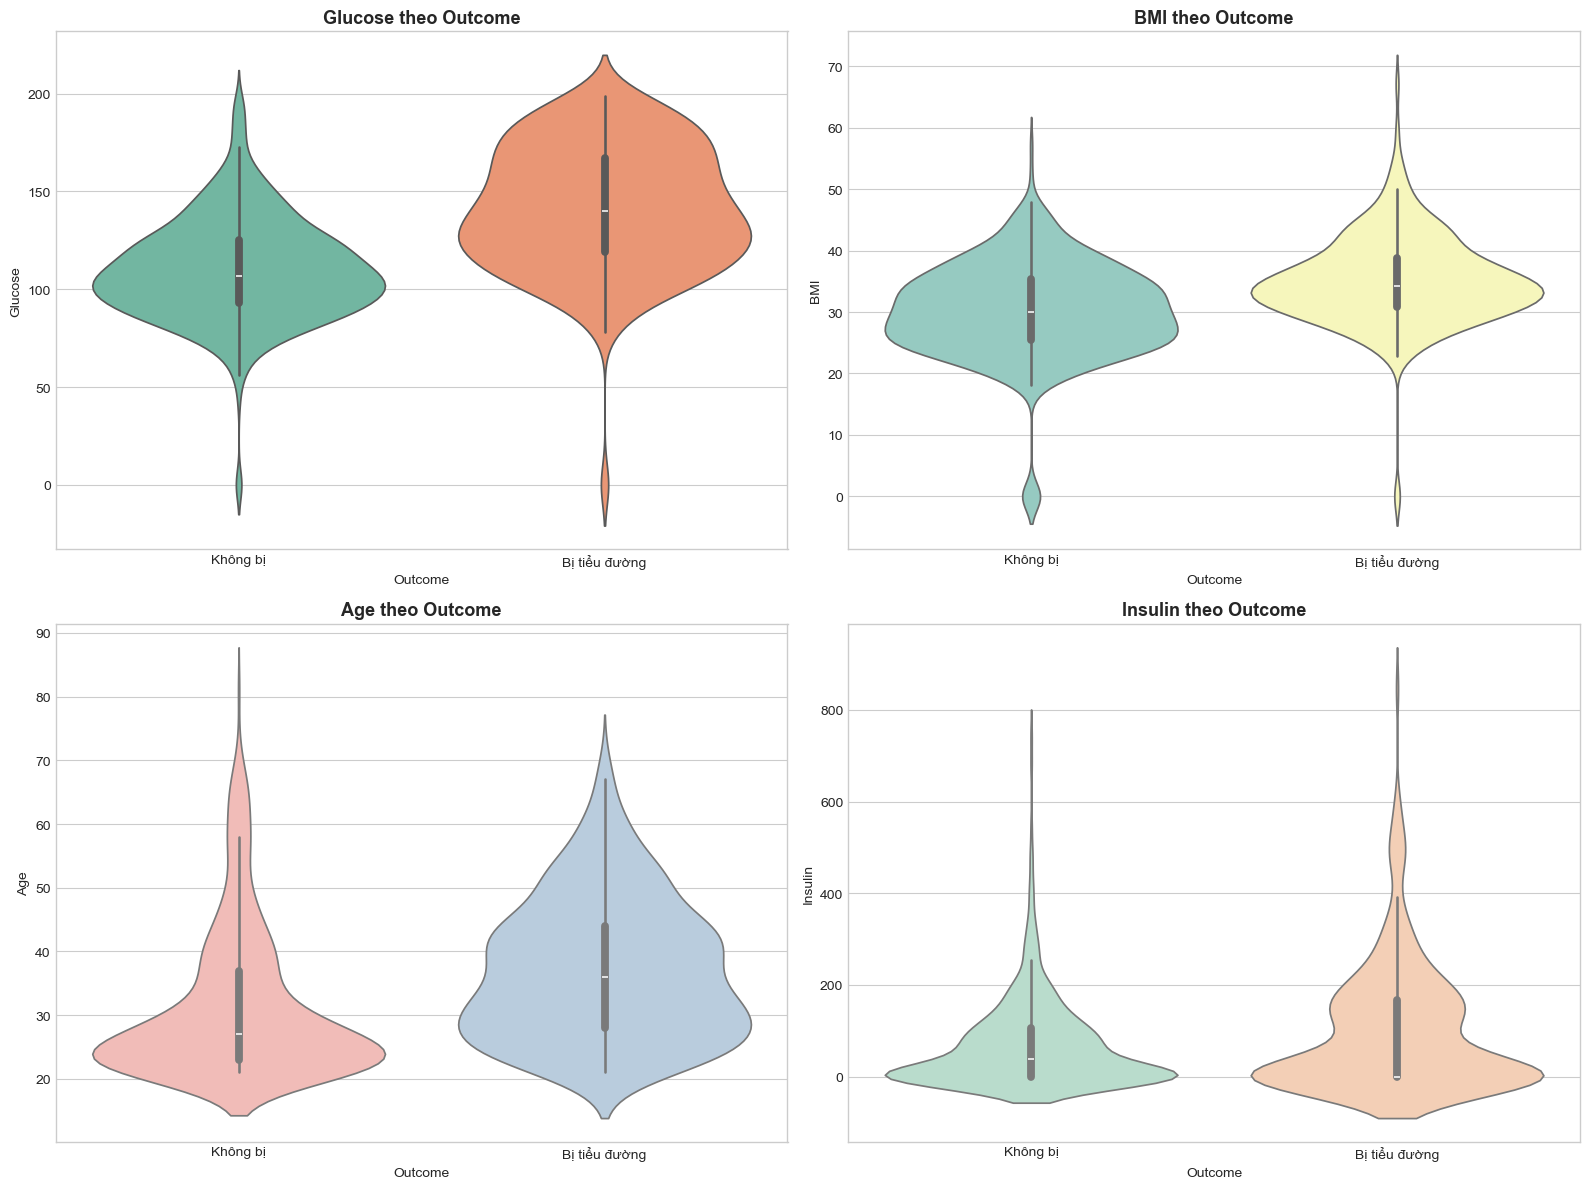

In [42]:
# Violin plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Glucose
sns.violinplot(data=diabetes_data, x='Outcome', y='Glucose', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Glucose theo Outcome', fontsize=13, fontweight='bold')
axes[0, 0].set_xticklabels(['Không bị', 'Bị tiểu đường'])

# BMI
sns.violinplot(data=diabetes_data, x='Outcome', y='BMI', ax=axes[0, 1], palette='Set3')
axes[0, 1].set_title('BMI theo Outcome', fontsize=13, fontweight='bold')
axes[0, 1].set_xticklabels(['Không bị', 'Bị tiểu đường'])

# Age
sns.violinplot(data=diabetes_data, x='Outcome', y='Age', ax=axes[1, 0], palette='Pastel1')
axes[1, 0].set_title('Age theo Outcome', fontsize=13, fontweight='bold')
axes[1, 0].set_xticklabels(['Không bị', 'Bị tiểu đường'])

# Insulin
sns.violinplot(data=diabetes_data, x='Outcome', y='Insulin', ax=axes[1, 1], palette='Pastel2')
axes[1, 1].set_title('Insulin theo Outcome', fontsize=13, fontweight='bold')
axes[1, 1].set_xticklabels(['Không bị', 'Bị tiểu đường'])

plt.tight_layout()
plt.show()

### 6.4. Pairplot cho các biến quan trọng

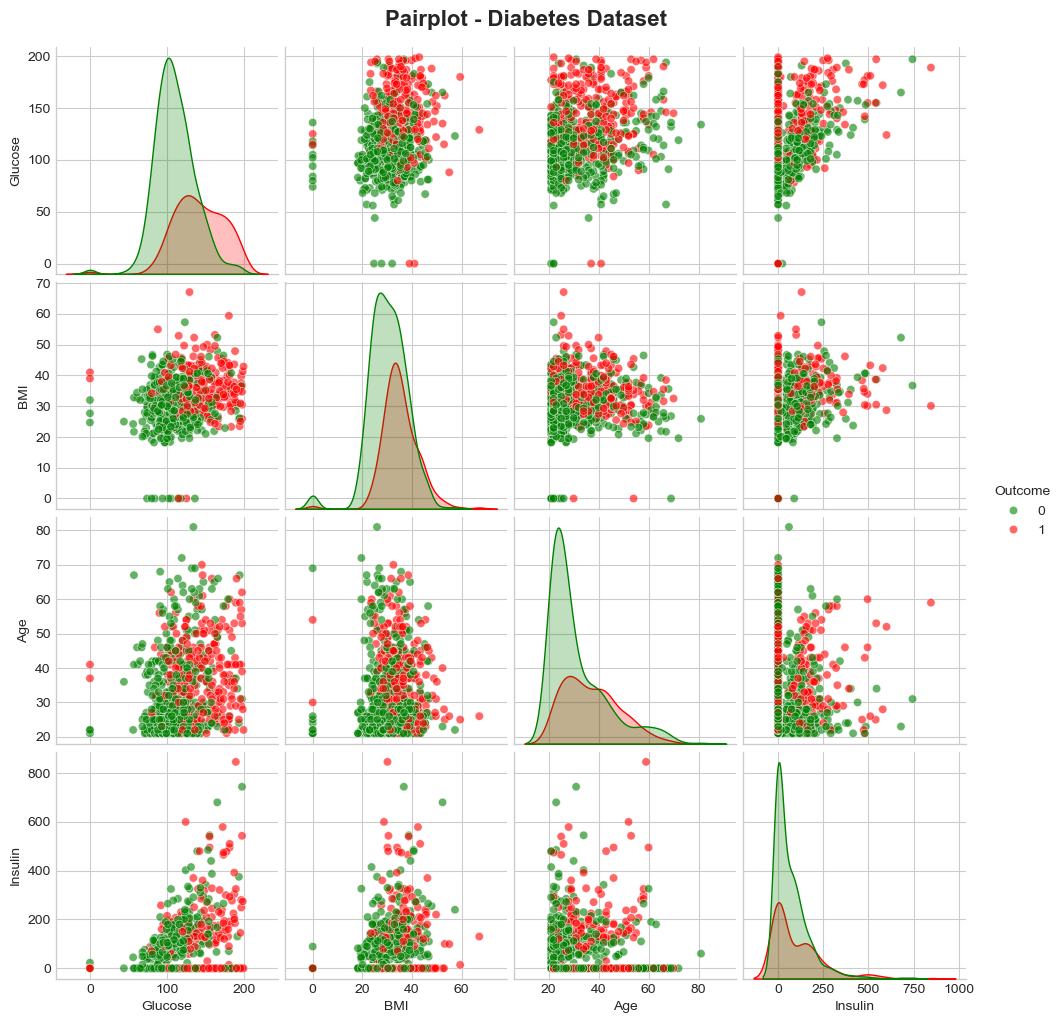

In [43]:
# Pairplot
important_cols = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
pairplot_data = diabetes_data[important_cols]

sns.pairplot(pairplot_data, hue='Outcome', palette={0: 'green', 1: 'red'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Diabetes Dataset', y=1.02, fontsize=16, fontweight='bold')
plt.show()

### 6.5. Phân tích theo nhóm tuổi

In [44]:
# Tạo nhóm tuổi
diabetes_data['AgeGroup'] = pd.cut(diabetes_data['Age'], 
                                   bins=[0, 30, 40, 50, 100],
                                   labels=['<30', '30-40', '40-50', '>50'])

# Tính tỷ lệ theo nhóm tuổi
age_outcome = pd.crosstab(diabetes_data['AgeGroup'], diabetes_data['Outcome'], normalize='index') * 100
print("\nTỷ lệ bệnh tiểu đường theo nhóm tuổi (%):")
print(age_outcome)


Tỷ lệ bệnh tiểu đường theo nhóm tuổi (%):
Outcome      0     1
AgeGroup            
<30      78.42 21.58
30-40    51.59 48.41
40-50    43.36 56.64
>50      53.09 46.91


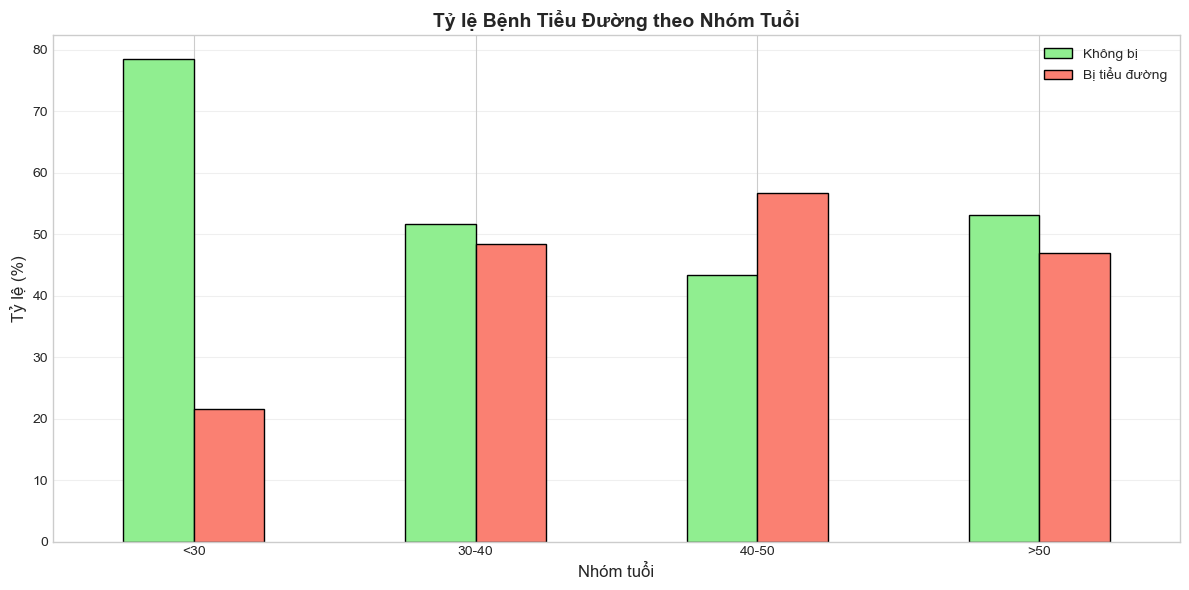

In [45]:
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
age_outcome.plot(kind='bar', ax=ax, color=['lightgreen', 'salmon'], edgecolor='black')
ax.set_title('Tỷ lệ Bệnh Tiểu Đường theo Nhóm Tuổi', fontsize=14, fontweight='bold')
ax.set_xlabel('Nhóm tuổi', fontsize=12)
ax.set_ylabel('Tỷ lệ (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(['Không bị', 'Bị tiểu đường'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 7. KẾT LUẬN VÀ NHẬN XÉT

### Những phát hiện chính:

#### 1. PHÂN BỐ DỮ LIỆU:
- 65.1% không bị tiểu đường, 34.9% bị tiểu đường (dữ liệu không cân bằng)
- Nhiều giá trị 0 bất thường trong Glucose, BloodPressure, BMI, Insulin
- Cần xử lý giá trị 0 trước khi xây dựng mô hình

#### 2. TƯƠNG QUAN VỚI BỆNH TIỂU ĐƯỜNG:
- **Glucose**: Tương quan dương mạnh nhất (+0.47)
- **BMI**: Tương quan dương (+0.29)
- **Age**: Tương quan dương (+0.24)
- **Pregnancies**: Tương quan dương (+0.22)

#### 3. PHÂN TÍCH THEO NHÓM:
- Người trên 50 tuổi có tỷ lệ mắc bệnh cao hơn
- Glucose > 140 mg/dL có nguy cơ cao
- BMI > 30 (béo phì) liên quan đến tiểu đường

#### 4. OUTLIERS:
- Insulin có nhiều outliers nhất
- SkinThickness và BloodPressure cũng có outliers đáng kể
